In [156]:
%%HTML
<style>
    /* style for notebook and presentation */
    
    /* divide slide in two columns*/
    .right_column{
        float: right;
        width: 45%;
        align: left}
    .left_column{
        float: left;
        width: 45%;
        align: left}
    .img{
        max-width:100% !important;
        max-height:100% !important;
    }
    
    .reveal .img{
        max-width:100% !important;
        max-height:100% !important;
    }
    .reveal .container { width:100% !important; height:768px !important }
 
    .reveal .slides {
        height: 100%;
        top: 0;
        margin-top: 0;}

    .reveal .slides>section {
        min-height: 100%;}

    .reveal .slides>section>section {
        min-height: 100%;}
    
    /* style for presentation only */
</style> 

# <center>Proteomic/Mass spectormetry</center>
</br>
<center>
Computational Omics<br/>
Computer Science, TU Dortmund<br/>
Prof. Dr. Sven Rahmann<br/>
Summer 2017
</center>

* mass spectormetry
 * two types
 * TOF (Time of flight) 
* Problems:
 * proteins are too heavy
* Solution
 * flatten the protein
 * splitt it up
 * measure parts

In [197]:
%%html
<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<div style =" height: 30%; width: 100%; border-bottom: 1px solid black">
    <div style="float: left; width: 20%; align: left; height: 100%;">
        <h1 style="text-align: center; vertical-align: middle;">
          Protein
        </h1>
    </div>
    <div style="float: right; width: 75%; align: left; height: 100%;">
        <img alt="protein"  src="grafics/protein.svg" style="height: 95%; width: auto">
    </div>
</div>

<div style = "height: 30%; width: 100%; border-bottom: 1px solid black">
    <div style="float: left; width: 20%; align: left; height: 100%;">
        <h1 style="text-align: center;">
          Flatted protein
        </h1>
    </div> 
    <div style="float: right; width: 75%; align: left; height: 100%;">
        <img alt="protein"  src="grafics/protein_flattened.svg" style="height: 95%; width: auto">
    </div>
</div>

<div style = "height: 30%; width: 100%; border-bottom: 1px solid black">
    <div style="float: left; width: 20%; align: left; height: 100%;">
        <h1 style="text-align: bottom;">
          Splitted protein
        </h1>
    </div>
    <div style="float: right; width: 75%; align: left; height: 100%;">
        <img alt="protein"  src="grafics/protein_splitted.svg" style="height: 95%; width: auto">
    </div>
</div>

markdownbraucht | header
:--- | :---
protein |![alt](grafics/protein.svg)
flattened protein |![alt](grafics/protein_flattened.svg)
splitted protein |  ![alt](grafics/protein_splitted.svg)

Populating the interactive namespace from numpy and matplotlib


/home/jens/miniconda3/envs/omics/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dot', 'interactive', 'matrix', 'mat', 'rand', 'solve', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


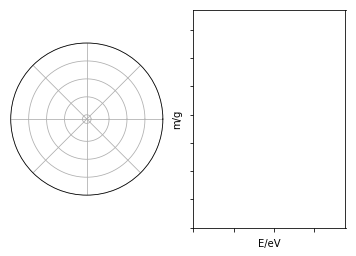

In [158]:
#%matplotlib notebook
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

#Settings

time_in_seconds = 5
fps = 60
steps = time_in_seconds * fps


# Runden bis zum 'Aufprall'
rounds = 3
limit = rounds * 2 * np.pi
xdata1, ydata1 = [], []
xdata2, ydata2 = [], []


#Figures
fig = plt.figure(1)
ax = plt.subplot(121, polar=True)
ax.set_ylim(np.power(np.e, -0.1 * limit), 1)
ax.axes.get_xaxis().set_ticklabels([])
ax.axes.get_yaxis().set_ticklabels([])
ln1, = plt.plot([], [], 'ro', animated=True)

ax = plt.subplot(122)
ax.set_xlim(0, limit)
ax.set_ylim(0, np.power(np.e, limit))
plt.xlabel('E/eV')
plt.ylabel('m/g')
ax.axes.get_xaxis().set_ticklabels([])
ax.axes.get_yaxis().set_ticklabels([])
ln2, = plt.plot([], [], 'r--', animated=True)


#Wichtig, damit die Animation richtig zeichnet und bei jedem loop
# die data-arrays geleert werden
def init():
    global xdata2, ydata2
    xdata1, ydata1 = [], []
    xdata2, ydata2 = [], []
    return ln1, ln2


#Updatefunktion für die Ergebnissmenge, die gerendert werden soll
def update(frame):
    global xdata2, ydata2
    xdata1 = [frame]
    ydata1 = [np.power(np.e, -0.1 * frame)]
    xdata2.append(frame)
    ydata2.append(np.power(np.e, frame) - limit)
    ln1.set_data(xdata1, ydata1)
    ln2.set_data(xdata2, ydata2)
    return ln1, ln2


# interval = 16, für 60 fps
anim = animation.FuncAnimation(fig,
                    update,
                    init_func=init,
                    frames=np.linspace(0.1, limit, steps),
                    blit=True,
                    interval=np.round(1000 / fps))


#Für das speichern als *.mp4

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=30, metadata=dict(artist='Jens Zentgraf'), bitrate=1800)
#anim.save('mass_fast.mp4', writer=writer)

#plt.tight_layout()

#plt.show()

In [159]:
#HTML(anim.to_html5_video())
from IPython.display import HTML

HTML(anim.to_html5_video())
#HTML(anim.to_jshtml())

Given: 
----
- A weighted alphabet $(\Sigma,\mu)$ that contains:
 - A set of symbols $\Sigma$
 - and a weight function $\mu:\Sigma \rightarrow \mathbb{Z}$
 - $\mu$ is called the parent mass
 
- String $s\in \Sigma^*$

A <span style="color:blue">spectrum</span> of a string $s$ is defined as:
---

$$\mathcal{M}=\{\mu(t):\text{ t is a pre- or suffix of s}\}$$


# Example:

<div style="float: left; width: 50%; align: left; height: auto;">
<h3>Given:</h3>
<ul>
    <li>$\Sigma=\{a,b,c,d\}$</li>
    <li>Parent Mass $\mu$</li>
    <ul>
        <li>$\mu(a)=2$</li>
        <li>$\mu(b)=3$</li>
        <li>$\mu(c)=7$</li>
        <li>$\mu(d)=10$</li>
    </ul>
    <li>$s=acab$</li>
    <li>$\mathcal{M}=\{\color{red}{0},2,3,5,9,11,12,\color{red}{14}\}$</li>
</ul>
</div>

<div style="float: right; width: 50%; align: left; height: auto;">
<h3>Searched:</h3>
<ul>
    <li>Reconstruct correct String</li>
    <li>Only use parent mass and spectrum</li>
</ul>
</div>

Assumption: All pre- and suffix masses are distinct (<span style="color:red">often wrong!</span>)

There are some difficulties in practic:
- data noise
- missing masses
- wrong masses
- masses occur more than once 
- ...

# Definition: Spectrum graph

The spectrum of the masses can be represented as a directed graph.
- $\text{Nodes }V = \mathcal{M} \cup \{0,M\}$
- $\text{Edges }E = \{(u,v)|\exists \sigma \in \Sigma:u+\sigma=v,u\in V,v\in V\}$

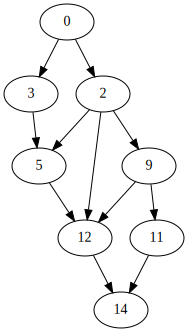

In [160]:
from graphviz import Digraph

dot = Digraph(comment='Spectrum graph')

dot

dot.node('0', '0')
dot.node('2', '2')
dot.node('3', '3')
dot.node('5', '5')
dot.node('9', '9')
dot.node('B', '11')
dot.node('C', '12')
dot.node('E', '14')

dot.edges(['02', '03', '25', '29', '2C', '35', '5C', '9B', '9C', 'BE', 'CE'])
dot

- $\text{Nodes }V = \mathcal{M} \cup \{0,M\} = \{0,14\}\cup\{2,3,5,9,11,12\}=\{0,2,3,5,9,11,12,14\}$
- $\text{Edges }E = \{(u,v)|\exists \sigma \in \Sigma:u+\sigma=v,u\in V, v\in V\}$

<img alt="spectrum_graph"  src="grafics/spectrum_graph.svg">

- Path from $0$ to $M=14$ represents the string

<img alt="spectrum_graph_acab"  src="grafics/spectrum_graph_acab.svg">


- $x\in \mathcal{M} \rightarrow M-x \in \mathcal{M}$
- Benenne Massen in $\mathcal{M} \cup \{0,M\}$ als

$$0=x_0<\underbrace{x_1<...<x_n<y_n<...<y_1}_{
\begin{aligned}
 & 2\cdot n\text{ different masses}\\
 & x_i+y_i=M\\
\end{aligned}
}<y_0=M$$

# Idea: Construct two paths at the same time

- prefix-path
- suffix-path

- Both paths must be disjoint
- All nodes must be visited

# Definition: 
- A pair of two paths
 - $x_0 \rightsquigarrow x_i$ prefix-path
 - $x_0 \rightsquigarrow x_j$ suffix-path
 
 is called permitted if:
 $$\forall l=1,...,max{i,j}: x_l\text{ is a part of the prefix-path or the suffix path}$$
 

<h1 style = "font-size:80%;">Definition: Admissibility matrix $D[0,...,n,0,...,n]$</h1>
<div style="float: left; width: 70%; align: left; height: 100%; font-size:80%;">
<ul>
<li> $D[i,j]=\begin{cases} 1 & \text{if the pair }i,j \text{ is a permitted pair of paths}\\ 0 & \text{else}\end{cases}$</li>
<li> $D[0,0] =1$</li>
<li> $D[j,j] = 0\ \forall j=1,..,n$</li>

 </ul>
 </div>
 
<div style="float: right; width: 30%; align: left">
<img alt="spectrum_graph_acab"  src="grafics/matrix.svg">
 </div>

<h1 style= "font-size:80%">Definition: Admissibility matrix $D[0,...,n,0,...,n]$</h1>
<div style="float: left; width: 70%; align: left; height: 100%; font-size:80%;">
<ul>
<li> $i\geq j+2:$</li>
    <ul>
        <li>$D[i,j]=\begin{cases} \max\{D[i-1,j]: (x_{i-1},x_i)\text{ is an endge}\\ 0\text{ otherwise}\end{cases} $ </li>
    </ul>
<li> $j\geq i+2:$</li>
    <ul>
        <li>analogous</li>
    </ul>
<li> $i=j+1$</li>
    <ul>
        <li>$D[j+1,j]=\begin{cases} \max\{D[l,j]: (x_l,x_{j+1})\text{ is an endge, }\forall l=0,..,j\}\\ 0\text{ if set is empty}\end{cases} $</li>
    </ul>
<li> $j=i+1$</li>
 - analogous
 </ul>
 </div>
 
<div style="float: right; width: 30%; align: middle">
<img alt="spectrum_graph_acab"  src="grafics/matrix.svg">
 </div>

In [161]:
from sys import stdout
from collections import Counter
import json
from argparse import ArgumentParser
from random import choices, randrange  # requires python 3.6
from random import random as rand

In [162]:
# load alphabet
with open('alphabet.json') as fa:
    alphabet = json.load(fa)

<h3> Define alphabet as: </h3>
<ul>
<li>'a': 2</li>
<li>'b': 3</li>
<li>'c': 7</li>
<li>'d': 10</li>
</ul>

 Return the list of prefix masses of s (or suffix masses if reverse=True),
    i.e., masses of s[:1], s[:2], ..., s[:n-1], where n=len(s).
    The parent mass is not included, nor is zero.

In [163]:
# load alphabet
with open('alphabet.json') as fa:
    alphabet = json.load(fa)

In [164]:
def compute_masses(s, alphabet, reverse=False):
    m = 0
    n = len(s)
    masses = []
    r = range(n-1)  if not reverse  else range(n-1, 0, -1)
    for i in r:
        m += alphabet[s[i]]
        masses.append(m)
    return masses

* Simulate a weighted string from given alphabet (dict of letter: mass).
* Compute exact prefix and suffix masses, ensure they are unique if unique==True.
* Return dict result with attributes 'truth': string, 'masses': Counter of masses.

In [165]:
def simulate(n, alphabet, unique):
    chars = sorted(alphabet.keys())
    i = 0
    while True:
        s = choices(chars, k=n)  # random string of length n from chars
        #s = "acab"
        result['truth'] = "".join(s)
        prefixmasses = compute_masses(s, alphabet)
        suffixmasses = compute_masses(s, alphabet, reverse=True)
        masses = Counter(prefixmasses + suffixmasses)
        if unique and max(masses.values()) > 1:
            i+=1
            continue
        break
    print("masses were %s times not unique" %i)
    result['masses'] = masses
    return result

In the mass spectrometry it can happen that it measures wrong masses or does not measure existing masses.

In [166]:
def loseMassesAccordingToLossRate(lossrate, masses):
    # a) lose some masses according to loss rate
    modmasses = Counter()
    for mass, freq in masses.items():
        for _ in range(freq):
            if rand() >= lossrate:
                modmasses[mass] += 1
    return modmasses

In [167]:
def addZeroAndParentMass(masses,modmasses, result):
    M = sum(alphabet[c] for c in result['truth'])  # parent mass
    masses[0] = 1; masses[M] = 100
    modmasses[0] = 1; modmasses[M] = 1

In [168]:
def addAdditionalMasses(additional, modmasses, masses, result):
    M = sum(alphabet[c] for c in result['truth'])  # parent mass
    additional = int(round(additional * len(masses)))
    for _ in range(additional):
        m = randrange(1, M)
        modmasses[m] += 1
    return modmasses

In [169]:
def storeResult(modmasses, alphabet, result, out):
    # store result as JSON
    result['modmasses'] = modmasses
    result['observation'] = sorted(modmasses.keys())  # no errors in observation
    result['alphabet'] = alphabet
    with open(out, "wt") as f:
        json.dump(result, f)

Simulate the MSMS:
* simulate the string
* lose existing masses
* add masses which does not belong to the string

In [170]:
def sim_msms(length, unique_masses, additional, lossrate, out):
    # run simulation and store the true masses, then modify them
    result = simulate(length, alphabet, unique_masses)
    masses = result['masses']
    
    # a) lose some masses according to loss rate
    modmasses = loseMassesAccordingToLossRate(lossrate, masses)

    # b) add some additional masses
    modmasses = addAdditionalMasses(additional, modmasses, masses, result)
    
    addZeroAndParentMass(masses, modmasses, result)
    
    # store result as JSON
    storeResult(modmasses, alphabet, result, out)

Backtrace:
- Generator function that yields all strings
- Inner function to calculate the traceback

In [171]:
def reconstruct(D, obs, invalphabet):
    """
    generator function that yields all strings with the observed mass spectrum "obs",
    using admissibility matrix "D" and the inverse alphabet "invalphabet",
    which must be a dictionary mass: letter.
    """

    def _traceback(i, j, prefix, suffix, traceback):
        """
        internal recursive traceback, yields (prefix, suffix) pairs,
        starting from D[i,j] (D given by the enclosing routine), which must be 1,
        extending existing partial prefix and partial suffix.
        """
        traceback.append((i,j))
        assert D[i,j] == 1
        if i==0 and j==0:
            yield (prefix, suffix, traceback)
            return
        # i != j
        if i >= j+2:  # go up
            c = invalphabet[obs[i] - obs[i-1]]
            yield from _traceback(i-1, j, [c]+prefix, suffix, traceback)
            return
        if j >= i+2:  # go left
            c = invalphabet[obs[j] - obs[j-1]]
            yield from _traceback(i, j-1, prefix, suffix+[c], traceback)
            return
        if i == j+1:
            for k in range(i):  # go up everywhere
                if D[k,j]:
                    delta = obs[i] - obs[k]
                    if delta not in invalphabet: continue
                    c = invalphabet[delta]
                    [c]+traceback
                    yield from _traceback(k, j, [c]+prefix, suffix, traceback)
            return
        if j == i+1:
            for k in range(j):  # go left everywhere
                if D[i,k]:
                    delta = obs[j] - obs[k]
                    if delta not in invalphabet: continue
                    c = invalphabet[delta]
                    yield from _traceback(i, k, prefix, suffix+[c], traceback)
            return
        raise RuntimeError("internal traceback error, should not happen")

    n = D.shape[0] - 1
    M = max(obs)  # parent mass
    # find 1s in the last row (prefixmass == obs[n])
    for j in range(n+1):
        if D[n,j]:
            missing = M - (obs[n] + obs[j])  # missing mass
            if missing not in invalphabet:
                # cannot connect prefix / suffix with any letter, so skip
                continue
            mid = [invalphabet[missing]]
            for (prefix, suffix, traceback) in _traceback(n, j, [], [], []):
                s = "".join(prefix + mid + suffix)
                yield s, traceback
                r = s[::-1]  # reversed string is also a solution
                if r != s: yield r, traceback

- function to compute every entry in D

In [ ]:
def _compute_D_entry(D, i, j, obs, invalphabet):
    """subroutine to compute a single element of D at [i,j].
    Return the computed element (0 or 1)."""
    if i==j:
        return 0 if i!=0 else 1
    if i >= j+2:
        return D[i-1,j] if (obs[i] - obs[i-1]) in invalphabet else 0
    if j >= i+2:
        return D[i,j-1] if (obs[j] - obs[j-1]) in invalphabet else 0
    if i == j+1:
        for k in range(i):
            if D[k,j] and ((obs[i]-obs[k]) in invalphabet):
                return 1
        return 0
    if j == i+1:
        for k in range(j):
            if D[i,k] and ((obs[j]-obs[k]) in invalphabet):
                return 1
        return 0
    raise RuntimeError("internal error, this should never happen")

- Compute the complete Matrix

In [173]:
def solve(obs, invalphabet):
    """
    compute admissibility matrix D from observed masses using dynamic programming,
    given the inverse alphabet (dict of mass: letter).
    Return matrix D as a 2-dimensional numpy array of uint8 (0/1 values only)."""
    n2 = len(obs) - 2
    assert n2 % 2 == 0
    n = n2 // 2
    D = np.zeros((n+1,n+1), dtype=np.uint8)
    for i in range(n+1):  # 0..n
        for j in range(n+1):
            D[i,j] = _compute_D_entry(D, i, j, obs, invalphabet)
    return D

In [174]:
def solve_all(result, tracebackForAnimation, matrix):
    """main function with parsed arguments "args"."""
    # read the problem instance (alphabet, observation)
    #with open(args.problem) as fp:  problem = json.load(fp)
    alphabet = result['alphabet']
    observation = result['observation']
    # invert alphabet:  mass -> letter;  then solve
    invalphabet = { v: k for (k,v) in alphabet.items() }
    D = solve(observation, invalphabet)
    matrix += D
    # obtain all valid strings from D using traceback ("reconstruct");
    # we expect to find the true string exactly once.
    truth = result['truth'];  truths = 0
    for s, traceback in reconstruct(D, observation, invalphabet):
        mark = ""  # for marking the true string
        if s==truth:
            tracebackForAnimation += traceback
            mark="*"
            truths += 1
        print(s, mark)
    if truths != 1:
        print("ERROR: expected to find the true string once, found {}".format(truths))

In [175]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [176]:
#result=dict()
"length, unique_masses, additional, lossrate, out) "

#tracebackForAnim= []
#sim_msms(4,1,0,0, "ausgabe.json")
#n = (len(result['observation'])-2)//2 +1
#matrix = np.zeros((n,n), dtype=np.uint8)
#solve_all(result, tracebackForAnim, matrix)



'length, unique_masses, additional, lossrate, out) '

In [177]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def calcColors(mat, tracebackForAnim):
    colorList = []

    colors = np.ones(mat.shape)
    #fullList = argmax([i[0][0] for i in tracebackForAnim])
    #print(tracebackForAnim)
    for i in range(len(tracebackForAnim)-1):
        if tracebackForAnim[i][0] == tracebackForAnim[i+1][0]:
            for j in range(tracebackForAnim[i][1] - tracebackForAnim[i+1][1]+1):
                colors[tracebackForAnim[i][0],tracebackForAnim[i][1]-j]=0
        if tracebackForAnim[i][1] == tracebackForAnim[i+1][1]:
            for j in range(tracebackForAnim[i][0] - tracebackForAnim[i+1][0]+1):
                colors[tracebackForAnim[i][0]-j,tracebackForAnim[i][1]]=0
        colorList.append(colors)
        colors = np.ones(mat.shape)
    return colorList

def computeAnimation(mat, tracebackForAnim):
    fig = plt.figure() 
    colorList = calcColors(mat, tracebackForAnim)
    ax = fig.add_subplot(1,1,1)
    ax.set_aspect('auto')
    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(mat.shape[0]), minor=False)
    ax.set_xticks(np.arange(mat.shape[1]), minor=False)

    for index, x in np.ndenumerate(mat):
        ax.text(index[0], index[1], x)
    frames = []
    for i in range(len(colorList)):
        im = plt.imshow(colorList[i],
                       cmap=plt.cm.ocean, animated=True)
        frames.append([im])

    ani = animation.ArtistAnimation(fig, frames, interval=1000, blit=True,
                                    repeat_delay=1000)
    return ani

# Traceback:

In [222]:
result = dict()

def f(x=4):    
    tracebackForAnim= []
    sim_msms(x,1,0,0, "ausgabe.json")

    n = (len(result['observation'])-2)//2 +1
    matrix = np.zeros((n,n), dtype=np.uint8)
    solve_all(result, tracebackForAnim, matrix)
    ani = computeAnimation(matrix, tracebackForAnim)
    return HTML(ani.to_html5_video())
    
interact(f, x=(2,10));

interactive(children=(IntSlider(value=4, description='x', max=10, min=2), Output()), _dom_classes=('widget-interact',))